In [286]:
from pathlib import Path
import pandas as pd
import numpy as np

In [287]:
processed = Path('../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [288]:
selection_data = selection_data[selection_data.year >= 2000]

In [289]:
selection_data[['spot', 'home']].value_counts()

spot  home
3.0   1.0     1683
      0.0     1462
1.0   0.0     1179
      1.0     1071
2.0   1.0      962
      0.0      881
4.0   1.0       87
      0.0       59
5.0   0.0        1
dtype: int64

In [290]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [291]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.0%


In [292]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [293]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

26

In [294]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.787709,17
2001.0,0.777778,24
2002.0,0.811111,15
2003.0,0.788889,18
2004.0,0.780556,16
2005.0,0.750000,12
2006.0,0.758333,15
2007.0,0.748619,16
2008.0,0.795580,18


In [295]:
selection_data['EstProb'].describe()

count    7385.000000
mean        0.739045
std         0.006295
min         0.687973
25%         0.735502
50%         0.738758
75%         0.743070
max         0.752114
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

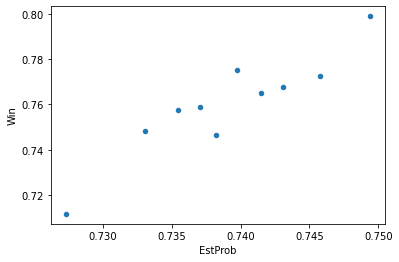

In [296]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [297]:
# Relief pitchers data

# Reduce noise by using rolling windows to calculate moving averages over seasons for park records, batting records, and pitching records.
# Improve to weighted averages

# Start including data from current season

# Relief pitchers data

# Game Scores/ELOs

# Team ratings

# Better Pitcher overall ratings

# Merge in 538 ELO ratings


# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# optimal skip strategy

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule?)

# Clean up program to select paramaters from sgd and feed them into NN

# add random state var to imputer and anything else random for repeatability

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# why is g d boost AUC ROC so low? check on test set

In [298]:
restricted = selection_data.loc[
    (selection_data['park_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [299]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

31

In [300]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

76.4%


In [301]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.809524,22
2001.0,0.777372,24
2002.0,0.825000,18
2003.0,0.795053,17
2004.0,0.768966,14
2005.0,0.735849,12
2006.0,0.748322,14
2007.0,0.743034,15
2008.0,0.796117,18


In [302]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [303]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [304]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2002.0,0.825000,18
2000.0,0.809524,22
2008.0,0.796117,18
2003.0,0.795053,17
2011.0,0.793220,13
2001.0,0.777372,24
2009.0,0.777049,23
2004.0,0.768966,14
2010.0,0.764228,11
